# E-Greedy and Bandit Algorithms

[Bandit algorithms](https://github.com/johnmyleswhite/BanditsBook) provide a way to optimize single competing actions in the shortest amount of time. Imagine you are attempting to find out which advert provides the best click through rate of which button provides the most sales. You could show two ads and count the number of clicks on each, over a one week period. But this means that many people would see a sub-optimal ad. Instead, you can learn over time and progressively shift the shown advert towards the one that is performing better. For more information see the references in the book.

https://rl-book.com/supplementary_materials/

## The Testing Environment

In [1]:
from arms.bernoulli import BernoulliArm

# Define two adverts, with a probability of clicking from the users
# This is a simulation. Imagine that these are real ads.
arm0 = BernoulliArm(0.05)
arm1 = BernoulliArm(0.4)
arms = [arm0, arm1]

"""
This is an important definition, which glosses over a few important aspects. 
Primarily, these simulations are responsible for providing a reward whenever the simulated person performs an action. 
Sometimes the reward is a 0, when they don’t click, other times it’s a 1 when they do. Look:
"""
[arm1.draw() for _ in range(5)]

[1.0, 0.0, 0.0, 0.0, 0.0]

## Running the Experiment With a Random Algorithm

Now we have the “environment” simulated, we can run various algorithms to see how often the optimal action is presented to the user.

A great baseline is a random agent, so let’s try that first.

But I need a bit of supporting code, because I’m not interested in raw decisions. I want to see how often button 2 was chosen. To do this, I will repeat the experiment 1000 times, and measure the proportion of time ad 2 was chosen.

In [5]:
import pandas as pd
from algorithms.epsilon_greedy.standard import EpsilonGreedy
from testing_framework.tests import test_algorithm


epsilon = 1 # Choose a random action every time
num_sims = 1000 # Number of repetitions
horizon = 250 # Length of experiment

df = pd.DataFrame() # Buffer
algo1 = EpsilonGreedy(epsilon, [], []) # Algorithm

sim_nums, times, chosen_arms, rewards, cumulative_rewards = test_algorithm(
        algo1, arms, num_sims, horizon) # Running the environment/algorithm via the library

arrays = [[epsilon] * num_sims * horizon, sim_nums, times] # Constructing the output array for aggregation
index = pd.MultiIndex.from_arrays(
        arrays, names=('epsilon', 'simulation', 'time'))

df_chosen_arm = pd.DataFrame(chosen_arms, index=index)
df_chosen_arm = df_chosen_arm.groupby(level=[0, 2]).sum() / num_sims # Aggregating to result in the proportion of time
df = pd.concat([df, df_chosen_arm]) # Append to buffer.

Matplotlib is building the font cache; this may take a moment.


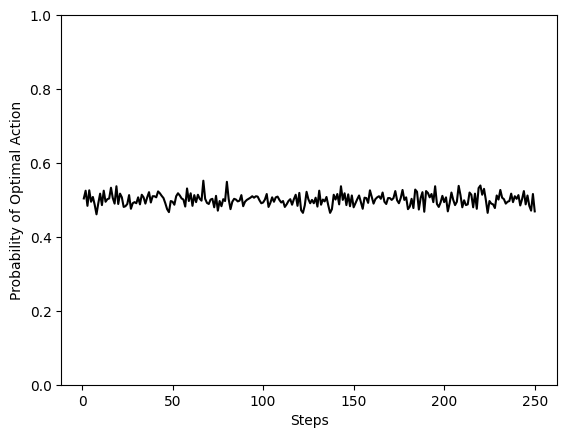

In [6]:
import matplotlib

df.loc[1].plot(legend=None,ylim=[0,1],ylabel="Probability of Optimal Action",xlabel="Steps",color="k");

## Running the Experiment with Several Algorithms
Now let’s try and repeat with several different values of epsilon, the value that chooses the amount of time the algorithm chooses a random action. An epsilon of 0 would never choose a random action.


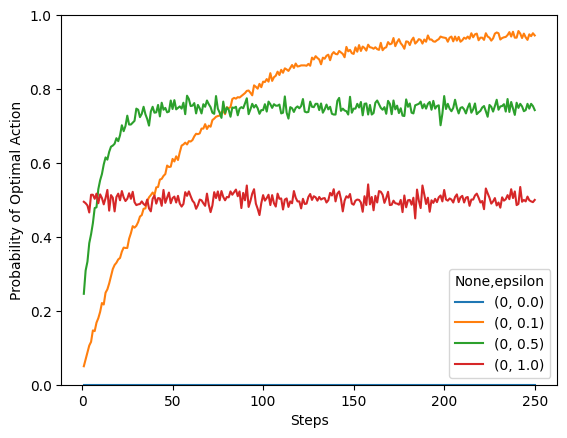

In [12]:
df = pd.DataFrame()
for epsilon in [0, 0.1, 0.5, 1]:
    algo1 = EpsilonGreedy(epsilon, [], [])
    sim_nums, times, chosen_arms, rewards, cumulative_rewards = test_algorithm(
        algo1, arms, num_sims, horizon)

    arrays = [[epsilon] * num_sims * horizon, sim_nums, times]
    index = pd.MultiIndex.from_arrays(
        arrays, names=('epsilon', 'simulation', 'time'))
    df_chosen_arm = pd.DataFrame(chosen_arms, index=index)
    df_chosen_arm = df_chosen_arm.groupby(level=[0, 2]).sum() / num_sims
    df = pd.concat([df, df_chosen_arm])

df.unstack(level=0).plot(ylim=[0,1],ylabel="Probability of Optimal Action",xlabel="Steps");